# **Classification on happy or sad face**


> Import the dependencies



In [ ]:
import cv2
import imghdr
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf



In [ ]:
data_dir = '/content/drive/MyDrive/data'

In [ ]:
os.listdir(os.path.join('/content/drive/MyDrive/data','happy'))

['traitshappypeople.jpg',
 'happy-man.jpg',
 '20180627194538-GettyImages-828514788.jpeg',
 '20150820205507-single-man-outdoors-happy-bliss.jpeg',
 'Happy-Guy.jpg',
 'Happy_guy.jpg',
 'happy-person.jpg',
 'Happy-people.png',
 'happy-person2.jpeg',
 'what-makes-people-happy1.jpg',
 'images13.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 'image19.jpeg',
 'how-to-become-a-happy-person.jpg',
 'images28.jpg',
 'images27.jpg',
 'images31.jpg',
 'lovepik-happy-man-png-image_401141286_wh1200.png',
 'riskshappypeopletakeh_1384254283.jpg',
 'images40.jpg',
 'compassion-900x387.jpg',
 'images45.jpg',
 'images48.jpg',
 'images52.jpg',
 'portrait-satisfied-young-man-celebrating-success_171337-10186.jpg',
 'friends-happy-190821.jpg',
 'hdptcar-fi-2.jpg',
 'skin-curly-hair-happy-person-portrait-smiling-young-friendly-woman-197501184.jpg',
 'happy-190806.jpg',
 'happy-person-nature-raised-arms-young-147569464.jpg',
 'habits-of-happy-people.jpg',
 'afro-girl-enjoying-the-sea-idyll-royalty-free-image-16

In [ ]:
image_extensions = ['jpeg','jpg','bmp','png']

In [ ]:
 # to check  every image whether it is in above extensions or not
 for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir , image_class , image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_extensions:
        print('Image not exist in list{}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      #os.remove(image_path)

In [ ]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 256 files belonging to 2 classes.


In [ ]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
#get another batch data
batch = data_iterator.next()

In [ ]:
len(batch)

2

In [ ]:
#images represented as numpy array
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int32)

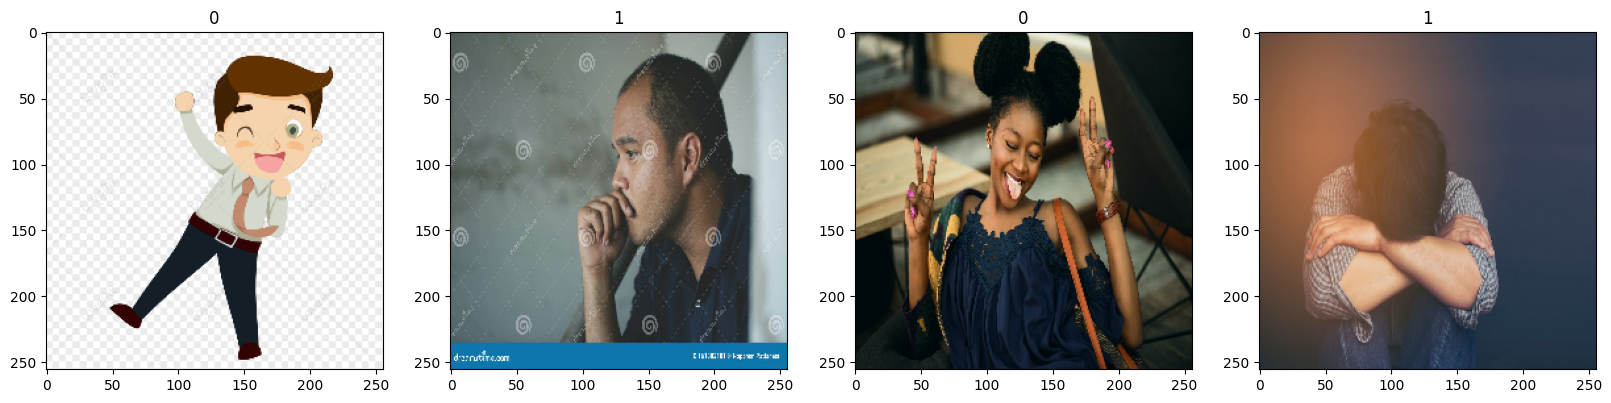

In [ ]:
 # check which class is assign to which label
fig , ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# **Preprocessing of data**

In [ ]:
#scaling of data
scaled_data = data.map(lambda x,y:(x/255,y))


In [ ]:
scaled_data.as_numpy_iterator().next()

(array([[[[0.0544424 , 0.05836397, 0.03875613],
          [0.03921569, 0.04313726, 0.02352941],
          [0.03921569, 0.04313726, 0.02352941],
          ...,
          [0.10862247, 0.14768115, 0.11670879],
          [0.6130534 , 0.6823989 , 0.71677005],
          [0.88896483, 0.9428864 , 0.9558766 ]],
 
         [[0.04929534, 0.05321691, 0.03360907],
          [0.03921569, 0.04313726, 0.02352941],
          [0.03921569, 0.04313726, 0.02352941],
          ...,
          [0.10464537, 0.10814951, 0.08875038],
          [0.20370328, 0.24591184, 0.19448146],
          [0.571178  , 0.6371094 , 0.66505057]],
 
         [[0.04831687, 0.05223843, 0.03263059],
          [0.04313726, 0.04705882, 0.02745098],
          [0.05098039, 0.05490196, 0.03529412],
          ...,
          [0.09782858, 0.11678156, 0.08933058],
          [0.3319834 , 0.3752068 , 0.3602003 ],
          [0.58985907, 0.6604473 , 0.699663  ]],
 
         ...,
 
         [[0.13333334, 0.13333334, 0.13333334],
          [0.13333


# split data



In [ ]:
len(scaled_data)

8

In [ ]:
train_size = int(len(scaled_data)*.7)
val_size = int(len(scaled_data)*.2)+1
test_size = int(len(scaled_data)*.1)+1

In [ ]:
train_size,val_size,test_size

(5, 2, 1)

In [ ]:
# so we will assign 32*5 = 160 images to training data
# 32*2 = 64 images for validation data
# 32 images for testing data

In [ ]:
# to assign data we use take and skip method available in tensorflow
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

In [ ]:
len(train),len(val),len(test)

(5, 2, 1)

## **DEEP LEARNING MODEL**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape = (256,256,3)))
# filter == 16 , filter s-ze = 3x3 pixels ,stride = 1
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss= tf.keras.losses.BinaryCrossentropy(),optimizer = tf.keras.optimizers.Adam(),metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# Training

In [ ]:
#create a log directry
logdir = '/content/drive/MyDrive/log'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(train,epochs =30,validation_data = val,callbacks=[tensorboard_callback])

Epoch 1/30
5/5 [==============================] - 27s 4s/step - loss: 0.7005 - accuracy: 0.4875 - val_loss: 0.6475 - val_accuracy: 0.6406
Epoch 2/30
5/5 [==============================] - 26s 5s/step - loss: 0.6341 - accuracy: 0.6187 - val_loss: 0.5728 - val_accuracy: 0.6406
Epoch 3/30
5/5 [==============================] - 21s 4s/step - loss: 0.5485 - accuracy: 0.6687 - val_loss: 0.5620 - val_accuracy: 0.6719
Epoch 4/30
5/5 [==============================] - 21s 4s/step - loss: 0.5224 - accuracy: 0.7125 - val_loss: 0.5671 - val_accuracy: 0.8750
Epoch 5/30
5/5 [==============================] - 21s 3s/step - loss: 0.4769 - accuracy: 0.8062 - val_loss: 0.3599 - val_accuracy: 0.8906
Epoch 6/30
5/5 [==============================] - 25s 4s/step - loss: 0.3888 - accuracy: 0.8687 - val_loss: 0.5013 - val_accuracy: 0.6875
Epoch 7/30
5/5 [==============================] - 22s 4s/step - loss: 0.4828 - accuracy: 0.7563 - val_loss: 0.3146 - val_accuracy: 0.8750
Epoch 8/30
5/5 [==================

# Plot performance

<Axes: >

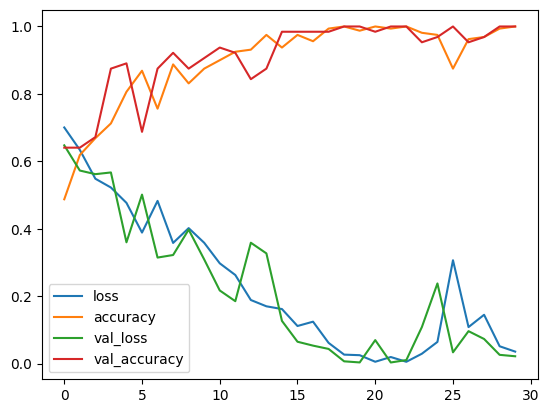

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

# Evaluate performance

In [ ]:
from tensorflow.keras.metrics import Precision , Recall ,BinaryAccuracy

In [ ]:
prec = Precision()

rec = Recall()

Acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  x , y = batch
  y_pred = model.predict(x)
  prec.update_state(y,y_pred)
  rec.update_state(y,y_pred)
  Acc.update_state(y,y_pred)

1/1 [==============================] - 1s 652ms/step


In [ ]:
print({'Precision':{prec.result().numpy()},'Reacll':{rec.result().numpy()},'Accuracy':{Acc.result().numpy()}})

{'Precision': {1.0}, 'Reacll': {1.0}, 'Accuracy': {1.0}}


# Test

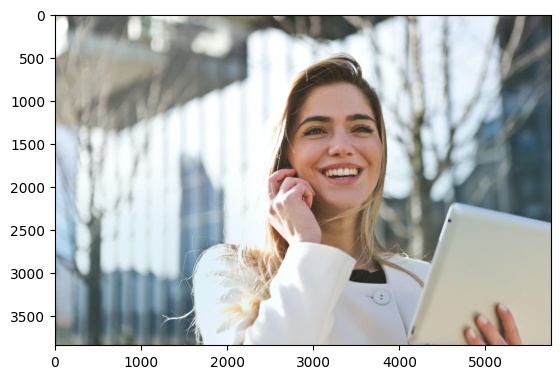

In [ ]:
# test the model on an unseen image
img = cv2.imread("/content/drive/MyDrive/happy.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

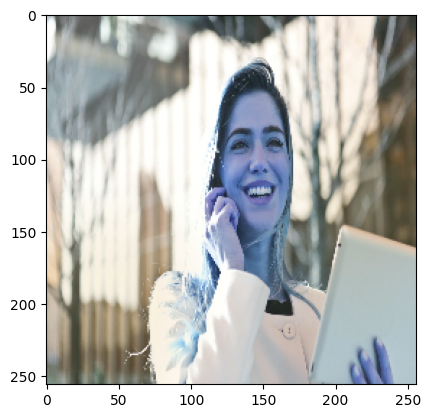

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

**NOW PREDICT THE TYPE OF FACE  USING OUR MODEL**

In [ ]:
# we have to input the data in batch so we use np.expand_dim
resize.shape, np.expand_dims(resize/255,0).shape



(TensorShape([256, 256, 3]), (1, 256, 256, 3))

In [ ]:
y_pred1 = model.predict(np.expand_dims(resize/255,0))
def result(yhat=y_pred1):
  print("probability is:",yhat)
  if y_pred1 < 0.5:
    print("yeh! it's a happy face....")
  else:
    print("oh! no it's a sad one.....")


1/1 [==============================] - 0s 109ms/step


In [ ]:
result(y_pred1)

probability is: [[0.07655448]]
yeh! it's a happy face....


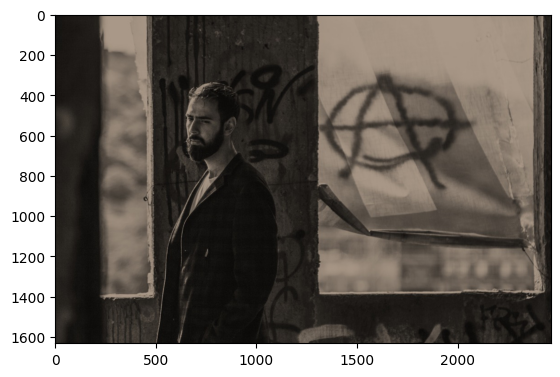

In [ ]:
# test the model on an unseen image
img = cv2.imread("/content/drive/MyDrive/sad.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

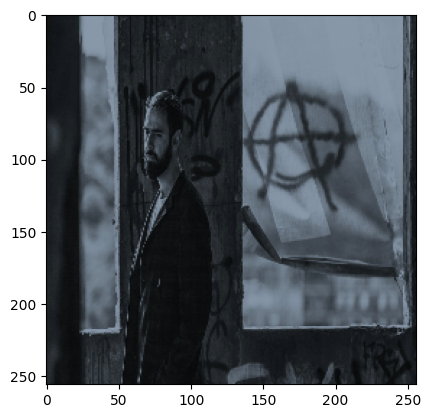

In [ ]:
resize1 = tf.image.resize(img,(256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [ ]:
y_pred1 = model.predict(np.expand_dims(resize1/255,0))
result(y_pred1)

1/1 [==============================] - 0s 101ms/step
probability is: [[0.9849951]]
oh! no it's a sad one.....


# Save the model

In [ ]:
model.save('happysadmodel.h5')